# EECS 16A Discussion 7B

# Problem: Polynomial Fitting

In this discussion, we are trying to fit data (observations) of the form $\{(x_i,y_i),i=1,2,...,n\}$ to a polynomial that we know looks like this:

$$y = f(x) = a_0 + a_1x + a_2x^2 + a_3x^3 + a_4x^4$$

In other words, we want to find $a_0$, $a_1$, $a_2$, $a_3$, and $a_4$ that best fit the data.

More generally, we might want to fit the data to a polynomial of different degree (for instance, if we do not know that the polynomial looks like as above), so we could try to solve for some $a_0,a_1,\ldots,a_d$ that define a $d$-degree polynomial.

Note that the observations are not perfect -- they are *noisy*, which means that $y_i \neq f(x_i)$ in general! That is what makes this problem interesting.

This first block of code contains functions that will help us set up some useful objects -- the polynomial curve for a set of parameters $a_0$, $a_1$, $a_2$, $a_3$, and $a_4$ and a "data" matrix that we will use to compute the least squares estimate later.

### Initialization

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import pi, cos, exp

%matplotlib inline

### Construct Data Matrix
Use this block to make the data matrix. The input data is given in the array `x_data`, and the output data is given in the array `y_data`.

To construct the data matrix, which we call `DataMat`, you only need to specify what degree polynomial you will use to fit the data.

If `x_data` has the form `x_{data}`$ =\begin{bmatrix}x_1\\x_2\\ \vdots \\x_n \end{bmatrix}$, then `DataMat` has the form `DataMat` $=\begin{bmatrix}1 &x_1&x_1^2& \cdots &x_1^d\\1 &x_2&x_2^2& \cdots &x_2^d\\ \vdots & \vdots & \vdots & \ddots & \vdots \\1 &x_n&x_n^2& \cdots &x_n^d \end{bmatrix}$, where $d$ is the degree of the polynomial.

### Function that defines a data matrix for some input data

In [2]:
"""You'll understand why it's constructed like this after
doing the worksheet!"""
def data_matrix(input_data,degree):
    # degree is the degree of the polynomial you plan to fit the data with
    Data=np.zeros((len(input_data),degree+1))

    for k in range(0,degree+1):
        Data[:,k]=(list(map(lambda x:x**k ,input_data)))

    return Data


### Function that helps with plotting

In [3]:
"""Function that defines the polynomial curve for a set of parameters and a range. The set of parameters defines the degree of the
polynomial."""
def poly_curve(params,x_input):
    # params contains the coefficients that multiply the polynomial terms, in degree of lowest degree to highest degree
    degree=len(params)-1
    x_range=[np.min(x_input), np.max(x_input)]
    x=np.linspace(x_range[0],x_range[1],1000)
    y=x*0

    for k in range(0,degree+1):
        coeff=params[k]
        y=y+list(map(lambda z:coeff*z**k,x))
    return x,y


### Printing the data matrix

In [4]:
x_data = [0.0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
y_data = [24.0, 6.61, 0, -0.95, 0.07, 0.73, -0.12, -0.83, -0.04, 6.42]

D = data_matrix(x_data, 4)
print(D)


[[1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
 [1.000000e+00 5.000000e-01 2.500000e-01 1.250000e-01 6.250000e-02]
 [1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00]
 [1.000000e+00 1.500000e+00 2.250000e+00 3.375000e+00 5.062500e+00]
 [1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01]
 [1.000000e+00 2.500000e+00 6.250000e+00 1.562500e+01 3.906250e+01]
 [1.000000e+00 3.000000e+00 9.000000e+00 2.700000e+01 8.100000e+01]
 [1.000000e+00 3.500000e+00 1.225000e+01 4.287500e+01 1.500625e+02]
 [1.000000e+00 4.000000e+00 1.600000e+01 6.400000e+01 2.560000e+02]
 [1.000000e+00 4.500000e+00 2.025000e+01 9.112500e+01 4.100625e+02]]


### Least Squares
Recall the system of equations we are trying to solve here:

$$\texttt{D}\vec{a} = \vec{y},$$ where $\vec{a} = \begin{bmatrix}a_0\\a_1\\:\\a_d\end{bmatrix}$ and $\vec{y} = \begin{bmatrix}y_1\\y_2\\ : \\y_n \end{bmatrix}$.

In the next block, you will implement code to compute $\vec{a}$, the set of optimal polynomial coefficients (optimal in a least squares sense) to fit the data. Put the coefficients in an array called params.

### Finding the least squares solution

In [5]:
# params = np.linalg.solve(np.dot(np.transpose(D), D), np.dot(np.transpose(D), y_data))
params = np.linalg.inv(np.transpose(D) @ D) @ np.transpose(D) @ y_data
print(params)

[ 24.00958042 -49.99515152  35.0039627   -9.99561772   0.99841492]


### Plot Curve Fit
Use the next block to compare your fitted polynomial to the data. All you need to do is enter the polynomial coefficients (in degree of lowest degree to highest degree) into an array called params.

### Plotting the fitted polynomial and the original datapoints

Text(0.5, 1.0, 'Polynomial of Degree 4')

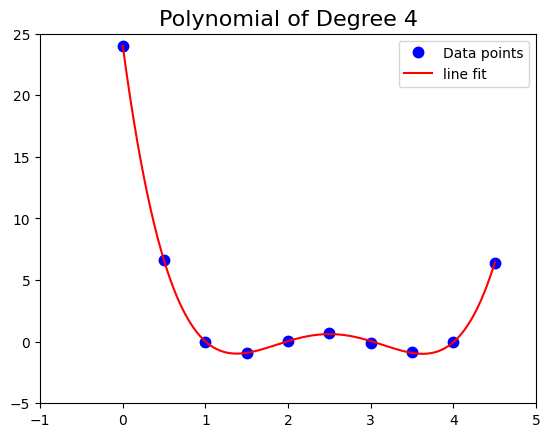

In [6]:
fig=plt.figure()
ax=fig.add_subplot(111,xlim=[-1,5],ylim=[-5,25])
x,y=poly_curve(params,x_data)  ###### Plotting the fitted data

ax.plot(x_data,y_data,'.b',markersize=15)   ###### Plotting the original data
ax.plot(x,y,'r')
ax.legend(['Data points','line fit'])
plt.title('Polynomial of Degree %d' %(len(params)-1),fontsize=16)

## [Practice] Another Polynomial Fitting Problem

### Input and output data

`x_data` is the input (set of $x_i$'s), and `y_data` is the output (set of $y_i$'s). Here we plot our test points. Does it look like $y$ should be a quartic polynomial in $x$?

In [7]:
np.random.seed(10)

# Parameters corresponding to the polynomial we want: $y = 1600 + 40x -102x^2 -x^3 + x^4$
smarap=np.array([1600,40,-102,-1,1])/100.0
x_data=np.linspace(-11,11,200)
y_data=np.dot(data_matrix(x_data,4),smarap)+(np.random.rand(len(x_data))-0.5)*10

y_data_training = y_data[0::2]
x_data_training = x_data[0::2]
y_data_test = y_data[1::2]
x_data_test = x_data[1::2]


### Plotting the original datapoints

200


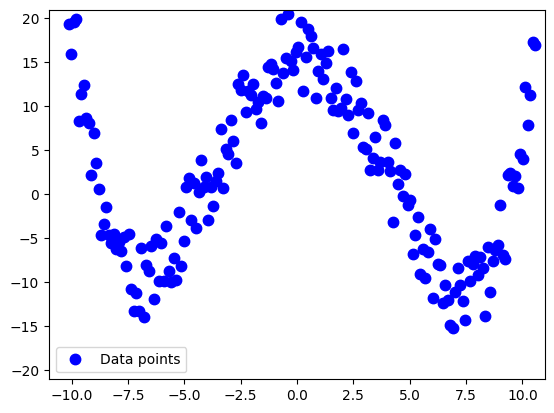

In [8]:
# x_data and y_data have already been defined

fig=plt.figure()
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
x,y=poly_curve(smarap,x_data)
ax.plot(x_data,y_data,'.b',markersize=15)
ax.legend(['Data points'])
print(len(x_data))

### Generating the matrix D

In [9]:
degree=4
D = data_matrix(x_data,degree)

### Finding the least squares solution

In [10]:
params = np.linalg.inv(np.transpose(D) @ D) @ np.transpose(D) @ y_data

### Plot Curve Fit
Use the next block to plot the fitted polynomial and find the magnitute of error.

Once you're done, re-run all the blocks of code for this problem for $\textbf{different degrees}$! What do you observe?

38.59612873946671


Text(0.5, 1.0, 'Polynomial of Degree 4, ||error||=38.596129')

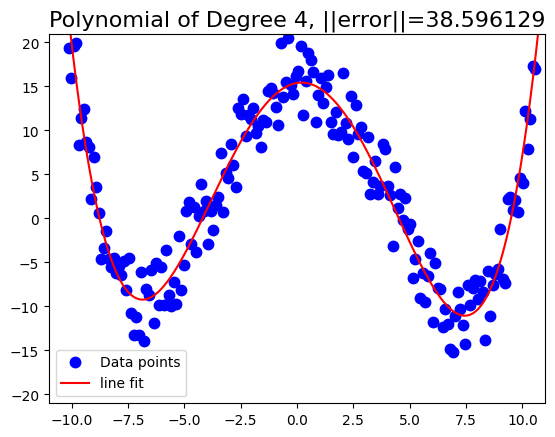

In [11]:
error = np.linalg.norm(y_data-np.dot(D,params))
print(error)

fig=plt.figure()
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
x,y=poly_curve(params,x_data)

ax.plot(x_data,y_data,'.b',markersize=15)
ax.plot(x,y,'r')
ax.legend(['Data points','line fit'])
plt.title('Polynomial of Degree %d, ||error||=%f' %(len(params)-1,error),fontsize=16)